In [14]:
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
import math
import joblib
import numpy as np
import pandas as pd
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import norm, gaussian_kde
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', '{:.2f}'.format)

In [18]:
y_test_path = Path('/Users/pititot/Documents/CienciaDatos/interest-rate-optimization/src/interest_rate_optimization/data/y_test.csv')
y_test_df = pd.read_csv(y_test_path)
y_test = y_test_df.tasa_interes

data_path = Path('/Users/pititot/Documents/CienciaDatos/interest-rate-optimization/src/interest_rate_optimization/data/df_test.csv')
df = pd.read_csv(data_path)

In [21]:
def clean_data(df):
    df['edad'] = df['edad'].where(df['edad'] <= 100, np.nan)
    df["saldo_productos_activos"] = df["saldo_productos_activos"].where(df["saldo_productos_activos"] >= 1000.00, np.nan)
    df["saldo_productos_pasivos"] = df["saldo_productos_pasivos"].where(df["saldo_productos_pasivos"] <= 47995816.00, np.nan)
    df["cantidad_productos_activos"] = df["cantidad_productos_activos"].where(df["cantidad_productos_activos"] <= 15, np.nan)
    df["cantidad_productos_pasivos"] = df["cantidad_productos_pasivos"].where(df["cantidad_productos_pasivos"] <= 15, np.nan)
    return df

df_cleansed = clean_data(df)

X_test = df_cleansed.drop(["id"], axis=1) 

# numerical_features = X_test.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = X_test.select_dtypes(include=['object', 'category']).columns

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', KNNImputer(n_neighbors=5), numerical_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ]
# )

In [22]:
model = joblib.load('model/random_forest_pipeline_model.joblib')
predictions = model.predict(X_test)

In [24]:
len(predictions)

5463

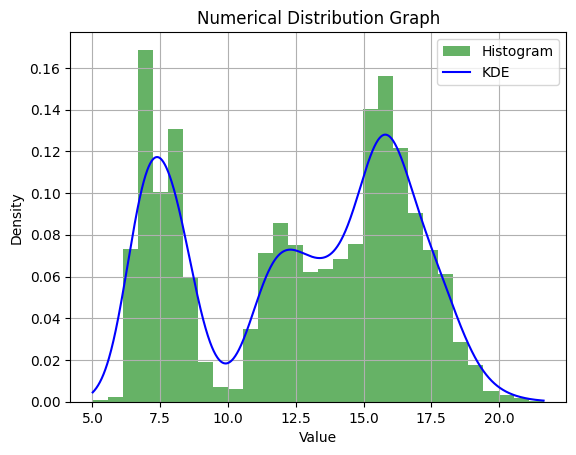

In [25]:

def numerical_distribution_graph(data_array):
    # Plot histogram
    plt.hist(data_array, bins=30, density=True, alpha=0.6, color='g', label='Histogram')

    # Calculate KDE
    kde = gaussian_kde(data_array, bw_method='scott')
    x_vals = np.linspace(min(data_array), max(data_array), 1000)
    kde_vals = kde(x_vals)

    # Plot KDE line
    plt.plot(x_vals, kde_vals, label='KDE', color='blue')

    plt.title('Numerical Distribution Graph')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

numerical_distribution_graph(predictions)


In [26]:
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("R2:", r2_score(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

MAE: 1.0582737863689131
MSE: 2.3993748802762713
R2: 0.8674809281595108
RMSE:  1.548991568820267
